In [1]:
import tensorflow


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
dataset=mnist.load_data()

In [4]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train=x_train.astype('float32')


In [7]:
x_test=x_test.astype('float32')

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
y_test=tensorflow.keras.utils.to_categorical(y_test,num_classes=10)
y_train=tensorflow.keras.utils.to_categorical(y_train,num_classes=10)

In [12]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))


In [13]:
import matplotlib.pyplot as plt

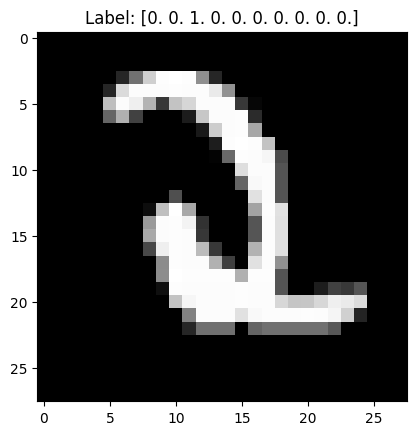

In [14]:
plt.imshow(x_train[400],cmap='grey')
plt.title(f'Label: {y_train[400]}')
plt.show()

In [15]:
model = tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.Conv2D(8,kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(tensorflow.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tensorflow.keras.layers.Conv2D(16,kernel_size=(3,3), activation="relu"))
model.add(tensorflow.keras.layers.Conv2D(4,kernel_size=(3,3), activation="relu"))
model.add(tensorflow.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(16, activation="relu"))

model.add(tensorflow.keras.layers.Dense(10, activation="softmax"))

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 4)             │             580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,038 (11.87 KB)

 Trainable params: 3,038 (11.87 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
             optimizer=tensorflow.keras.optimizers.Adam(),metrics=['Accuracy'])

In [18]:
model.fit(x_train,y_train,batch_size=32,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - Accuracy: 0.8658 - loss: 0.4289
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - Accuracy: 0.9554 - loss: 0.1482


In [19]:
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [20]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Accuracy: 0.9691 - loss: 0.1066


[0.10657906532287598, 0.9690999984741211]

In [21]:
pred_class=pred.argmax(axis=1)

In [22]:
pred_class

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))